In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from tqdm import tqdm

분석 전 게임 정보
- 경매장에서 거래되는 아이템들이 다른 서버 유저와 거래 가능 -> 서버 별 df 분리 X
- 직업 별 착용 아이템이 다름 -> 직업 별로 df 분리

## 유저 정보 데이터 전처리
- 'slotId'
- 'slotName'
- 'itemId'
- 'itemName'
- 'clone_itemId'
- 'clone_itemName'


파츠 속성 중 6개 속성 선정</br>
12개의 파츠에 적용

### 데이터 불러오기

In [2]:
user1 = pd.read_csv("user1.csv")
user2 =pd.read_csv("user2.csv")
user3 =pd.read_csv("user3.csv")

user = pd.concat([user1,user2,user3],ignore_index=True)
del user1,user2,user3

In [3]:
output1 = pd.read_csv("output1.csv")
output2 =pd.read_csv("output2.csv")
output3 =pd.read_csv("output3.csv")

data = pd.concat([output1,output2,output3],ignore_index=True)

# data = data.drop('Unnamed: 0', axis=1)

del output1,output2,output3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9672\2480974654.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9672\2480974654.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  output3 =pd.read_csv("output3.csv")


### 칼럼명 정의

In [4]:
name = ['HEADGEAR'
,'HAIR'
,'FACE'
,'JACKET'
,'PANTS'
,'SHOES'
,'BREAST'
,'WAIST'
,'SKIN'
,'AURORA'
,'WEAPON'
,'AURA_SKIN']

In [5]:
columns = [
    'characterId',
'characterName',
'jobId',
'jobName',
'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',

'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',

'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',

'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',

'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',

'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',

'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',

'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',

'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',
'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',
'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',
'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',
'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName',
]

### 데이터 전처리

In [6]:
user = user[['serverId','characterId','characterName','fame']]
user

,serverId,characterId,characterName,fame
0,anton,150a23219a59e086e36db59028c06a50,헤롱카테,66993
1,hilder,0daa8c49cae531262f966dd637008e30,민트크림소스,66787
2,anton,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,66702
3,prey,3ba38c77f2868f34d910e362d0f4cae1,프라디지,66666
4,diregie,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,66660
...,...,...,...,...
90595,hilder,5c37706a64742ce164d02b06456ec3d9,윤아에용,60468
90596,cain,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,60468
90597,prey,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,60468
90598,prey,9c068b798696f994d39b14a0840abb10,찌뮤,60468


In [7]:
data = data[columns]
data

,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_itemId,WEAPON__avatar_itemName,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,NaN,NaN
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,6f664071d276072fdc25371252816989,레어 무기 클론 아바타[75Lv],f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,dd013289916783dddc5a90f378682e40,레어 무기 클론 아바타[80Lv],d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,NaN,NaN
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,7b0532818737be0b0e6f1e2c4042cf60,레어 무기 클론 아바타[75Lv],a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,NaN,NaN
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,NaN,NaN,...,f99c56e62fa39e93ec0f1fe793ccf05c,레어 무기 클론 아바타[45Lv],6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90595,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,5c94117f7b5b2232b776011cfa42579e,무기 클론 아바타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90596,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,ccde39545f0f69b26e9f6b23f41751a0,레어 무기 클론 아바타[70Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90597,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90598,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,f17318c539c39d6b6505462c13acc733,레어 무기 클론 아바타[60Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN


In [8]:
df = pd.concat([data,user[['serverId','fame']]], axis=1)

In [9]:
del user, data

## 이상치 검색

#### 1. characterName이 없는 데이터

In [10]:
df['characterName'].isnull().sum()

2

In [11]:
df['serverId'].isnull().sum()

0

In [12]:
df['characterName'].isnull().sum()

2

In [13]:
# for i in tqdm(range(len(df))):
#     if df['characterName'].isnull()[i]:
#         print(i)

In [14]:
df.iloc[20141,]

characterId                           NaN
characterName                         NaN
jobId                                 NaN
jobName                               NaN
HEADGEAR__avatar_slotId               NaN
                                    ...  
AURA_SKIN__avatar_itemName            NaN
AURA_SKIN__avatar_clone_itemId        NaN
AURA_SKIN__avatar_clone_itemName      NaN
serverId                             cain
fame                                61963
Name: 20141, Length: 78, dtype: object

In [15]:
df.iloc[78245,]

characterId                             NaN
characterName                           NaN
jobId                                   NaN
jobName                                 NaN
HEADGEAR__avatar_slotId                 NaN
                                     ...   
AURA_SKIN__avatar_itemName              NaN
AURA_SKIN__avatar_clone_itemId          NaN
AURA_SKIN__avatar_clone_itemName        NaN
serverId                            diregie
fame                                  60619
Name: 78245, Length: 78, dtype: object

In [16]:
df.drop([20141,78245], axis=0, inplace=True)

>> api로 받아오는 과정 사이 캐릭터 삭제 추정 (2개) -> 데이터 삭제

#### 2. 중복 데이터

In [17]:
df.duplicated(['characterId']).sum()

9056

characterId가 같은데 서버가 다른 데이터 존재

In [18]:
df.duplicated().sum()

9004

명성차이가 존재하고 나머지 칼럼은 동일한 경우 존재

In [19]:
df.duplicated(['characterId', 'serverId']).sum()

9009

'characterId', 'serverId'을 기준으로 데이터 제거

In [20]:
user_avatar_table = df.drop_duplicates(subset = ['characterId', 'serverId'] , keep = 'first' ,ignore_index = True)

In [21]:
user_avatar_table.duplicated().sum()

0

## 직업별 df 분리
- '다크나이트' 와 '귀검사(남)' , '크리에이터' 와 '마법사(여)' 는 아바타를 같은 것 사용
- 오라는 직업 구분 없음


In [22]:
jobdf = user_avatar_table['jobName'].value_counts()
jobdf=jobdf.sort_index()
jobdf

jobName
거너(남)       5207
거너(여)       3534
격투가(남)      1973
격투가(여)      5054
귀검사(남)      8588
귀검사(여)      9239
나이트         2914
다크나이트        503
도적          2221
마법사(남)      1978
마법사(여)     11615
마창사         1558
아처         10601
총검사         1929
크리에이터        266
프리스트(남)     5474
프리스트(여)     8935
Name: count, dtype: int64

#### 직업별 분포

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarnin

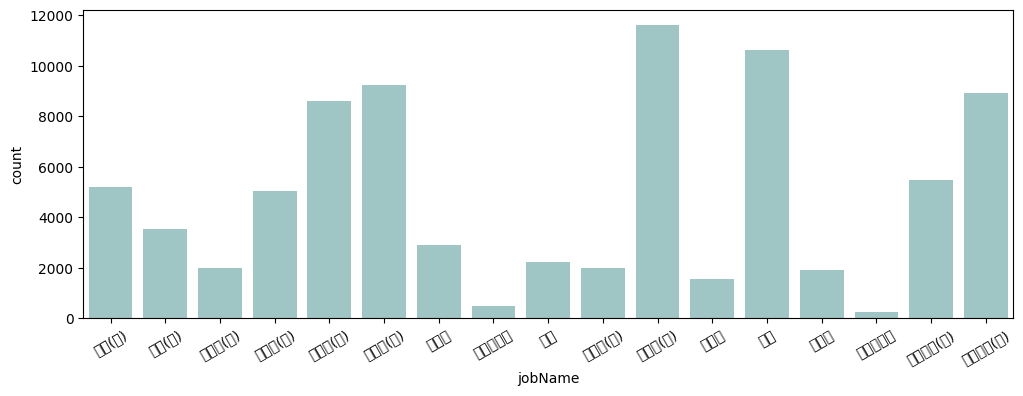

In [23]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=jobdf, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

여성 캐릭터의 비율이 높은 것으로 확인이 됨<br>
여성 캐릭터의 아바타의 인기가 높다는 추정을 하여 추후 아바타의 거래량과 시세를 통해 인기의 척도를 확인할 예정

#### 직업별 명성

In [24]:
user_avatar_table['fame'].mean()

61497.63079581806

In [25]:
user_avatar_table.groupby("jobName")['fame'].max().sort_values()

jobName
다크나이트      65938
크리에이터      65954
마법사(남)     66215
총검사        66237
마창사        66303
격투가(남)     66305
거너(여)      66317
나이트        66382
귀검사(여)     66386
격투가(여)     66402
프리스트(남)    66425
도적         66430
아처         66539
프리스트(여)    66660
귀검사(남)     66666
거너(남)      66702
마법사(여)     66993
Name: fame, dtype: int64

In [26]:
user_avatar_table.groupby("jobName")['fame'].mean().sort_values()

jobName
아처         61338.011320
프리스트(여)    61403.726245
마창사        61427.527599
총검사        61454.269051
프리스트(남)    61484.298502
격투가(여)     61499.138702
나이트        61502.678449
귀검사(여)     61511.884078
귀검사(남)     61539.501281
마법사(남)     61541.129424
마법사(여)     61542.595695
거너(여)      61576.944539
도적         61578.837461
격투가(남)     61603.283832
크리에이터      61662.488722
거너(남)      61665.202036
다크나이트      61675.759443
Name: fame, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9672\785365589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_avatar_table.sort_values(by='jobName' ,ascending=True), x='jobName', y='fame', palette = 'Set3')


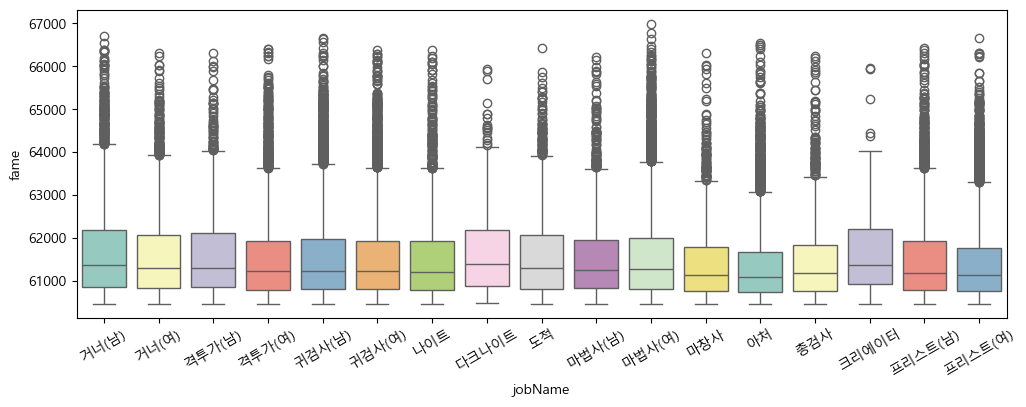

In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(data=user_avatar_table.sort_values(by='jobName' ,ascending=True), x='jobName', y='fame', palette = 'Set3')
plt.xticks(rotation=30)
plt.show()

중간값과 25%~75%의 값들은 상대적으로 비슷한 수준을 띄고 있으나 최댓값들의 차이가 존재함을 알 수 있음</br>
유저 수가 적은 직업들의 명성 최댓값이 높은 것을 확인 할 수 있음</br>


In [28]:
joblist = list(df['jobName'].unique())


거너(남) : GunnerM</br>
거너(여) : GunnerW</br>
격투가(남) : FighterM</br>
격투가(여) : FighterW</br>
귀검사(남) : Ghost KnightM</br>
귀검사(여) : Ghost KnightW</br>
나이트 : Knight</br>
다크나이트 : Dark Knight</br>
도적 : Thief</br>
마법사(남) : MageM</br>
마법사(여) : MageW</br>
마창사 : Demonic Lancer</br>
아처 : Archer</br>
총검사 : Gunblader</br>
크리에이터 : Creator</br>
프리스트(남) : PriestM</br>
프리스트(여) : PriestW</br>

In [29]:

user_avatar_table = user_avatar_table.astype('str')
user_avatar_table = user_avatar_table.astype({'fame':'int'})


In [30]:
parts = ['HEADGEAR__avatar',
'HAIR__avatar',
'FACE__avatar',
'JACKET__avatar',
'PANTS__avatar',
'SHOES__avatar',
'BREAST__avatar',
'WAIST__avatar',
'SKIN__avatar',
'AURORA__avatar',
'WEAPON__avatar',
'AURA_SKIN__avatar']

In [31]:
for n,part in enumerate(parts):
    print(part)
    c=0
    for i in tqdm(range(len(user_avatar_table))):
        try:
            
            if user_avatar_table.loc[i,part+'_clone_itemName']=='nan':
                if user_avatar_table.loc[i,part+'_itemName']=='nan':
                    #print(df.loc[i,part+'_itemId'])
                    c+=1
                user_avatar_table.loc[i,part+'_clone_itemName'] = user_avatar_table.loc[i,part+'_itemName']
            
            if user_avatar_table.loc[i,part+'_clone_itemId']=='nan':
                if user_avatar_table.loc[i,part+'_itemId']=='nan':
                    #print(df.loc[i,part+'_itemId'])
                    c+=1
                user_avatar_table.loc[i,part+'_clone_itemId'] = user_avatar_table.loc[i,part+'_itemId']
                
        except KeyError:
            print(i)
            pass
    print(c)
user_avatar_table

HEADGEAR__avatar


100%|██████████| 81589/81589 [00:10<00:00, 7826.96it/s]


300
HAIR__avatar


100%|██████████| 81589/81589 [00:09<00:00, 8997.63it/s] 


330
FACE__avatar


100%|██████████| 81589/81589 [00:14<00:00, 5532.44it/s]


350
JACKET__avatar


100%|██████████| 81589/81589 [00:05<00:00, 15338.45it/s]


260
PANTS__avatar


100%|██████████| 81589/81589 [00:07<00:00, 10900.38it/s]


270
SHOES__avatar


100%|██████████| 81589/81589 [00:06<00:00, 11746.44it/s]


312
BREAST__avatar


100%|██████████| 81589/81589 [00:15<00:00, 5363.85it/s]


360
WAIST__avatar


100%|██████████| 81589/81589 [00:19<00:00, 4196.08it/s]


336
SKIN__avatar


100%|██████████| 81589/81589 [00:51<00:00, 1573.21it/s]


542
AURORA__avatar


100%|██████████| 81589/81589 [00:51<00:00, 1580.46it/s]


14
WEAPON__avatar


100%|██████████| 81589/81589 [00:15<00:00, 5432.03it/s]


566
AURA_SKIN__avatar


100%|██████████| 81589/81589 [00:51<00:00, 1583.91it/s]

43520


,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName,serverId,fame
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,anton,66993
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라,hilder,66787
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,anton,66702
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,025ff1f20ce27272539704aedb878ac1,연옥의 불길,prey,66666
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,...,6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,f99513274bbef4290a1379c223933338,조화가 무너진 기억,diregie,66660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81584,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,5c94117f7b5b2232b776011cfa42579e,무기 클론 아바타,nan,nan,nan,nan,nan,nan,hilder,60468
81585,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,ccde39545f0f69b26e9f6b23f41751a0,레어 무기 클론 아바타[70Lv],AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,f99513274bbef4290a1379c223933338,조화가 무너진 기억,cain,60468
81586,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,f99513274bbef4290a1379c223933338,조화가 무너진 기억,prey,60468
81587,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,f17318c539c39d6b6505462c13acc733,레어 무기 클론 아바타[60Lv],AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,f99513274bbef4290a1379c223933338,조화가 무너진 기억,prey,60468


In [32]:
user_avatar_table.loc[:,'SKIN__avatar_clone_itemName']

0                        살굿빛 피부
1           워터밤 페스타 순백의 피부[D타입]
2              블래스터 우윳빛 피부[D타입]
3                         백옥 피부
4             초원의 영혼 순백 피부[D타입]
                  ...          
81584           배틀슈트 잿빛 피부[A타입]
81585         다크로드의 살굿빛 피부[D타입]
81586      진 인챈트리스의 살굿빛 피부[A타입]
81587        헤드라이너의 상앗빛 피부[A타입]
81588    아라드 패스 해군 제독의 여프리스트 피부
Name: SKIN__avatar_clone_itemName, Length: 81589, dtype: object

In [33]:
GunnerM = user_avatar_table[user_avatar_table['jobName']=='거너(남)']
GunnerW = user_avatar_table[user_avatar_table['jobName']=='거너(여)']
FighterM = user_avatar_table[user_avatar_table['jobName']=='격투가(남)']
FighterW = user_avatar_table[user_avatar_table['jobName']=='격투가(여)']
GhostknightM = user_avatar_table[user_avatar_table['jobName']=='귀검사(남)']
GhostknightW = user_avatar_table[user_avatar_table['jobName']=='귀검사(여)']
Knight = user_avatar_table[user_avatar_table['jobName']=='나이트']
Darkknight = user_avatar_table[user_avatar_table['jobName']=='다크나이트']
Thief = user_avatar_table[user_avatar_table['jobName']=='도적']
MageM = user_avatar_table[user_avatar_table['jobName']=='마법사(남)']
MageW = user_avatar_table[user_avatar_table['jobName']=='마법사(여)']
Demoniclancer = user_avatar_table[user_avatar_table['jobName']=='마창사']
Archer = user_avatar_table[user_avatar_table['jobName']=='아처']
Gunblader = user_avatar_table[user_avatar_table['jobName']=='총검사']
Creator = user_avatar_table[user_avatar_table['jobName']=='크리에이터']
PriestM = user_avatar_table[user_avatar_table['jobName']=='프리스트(남)']
PriestW = user_avatar_table[user_avatar_table['jobName']=='프리스트(여)']

In [34]:
a="GunnerM,GunnerW,FighterM,FighterW,GhostknightM,GhostknightW,Knight,Darkknight,Thief,MageM,MageW,Demoniclancer,Archer,Gunblader,Creator,PriestM,PriestW"
jobname = a.split(",")

In [35]:
jobname

['GunnerM',
 'GunnerW',
 'FighterM',
 'FighterW',
 'GhostknightM',
 'GhostknightW',
 'Knight',
 'Darkknight',
 'Thief',
 'MageM',
 'MageW',
 'Demoniclancer',
 'Archer',
 'Gunblader',
 'Creator',
 'PriestM',
 'PriestW']

In [36]:
jobdf_list = [GunnerM,
GunnerW,
FighterM,
FighterW,
GhostknightM,
GhostknightW,
Knight,
Darkknight,
Thief,
MageM,
MageW,
Demoniclancer,
Archer,
Gunblader,
Creator,
PriestM,
PriestW,]

### 유저가 착용 중인 아이템 확인

In [37]:
user_avatar_table['HEADGEAR__avatar_itemId'].value_counts().index

Index(['2defdc2422ff3c61f5ac1af583e79459', '92d9839ad426f31e9de3508d001f84ca',
       '4073653019b52f859d27c96265c0b0a3', 'c90044ec63bf1520c5bc4a9385ff466d',
       '3bd48b7a41985ad02bd07ec91dcf04a8', 'b8c1f046fe4fe0677f19195385d19b04',
       '80c6a6b7b5c1ab32bb401dfadf76ace8', 'b8719abf78adc19335324f5a36f5987c',
       'c8032d3f73fee655c33b30444ddd1eaa', '851f5dae01e9ed0597e533cd78700f00',
       ...
       '265246e42d5187172da71d5d28de41fe', '60a9f1a40af38bc1050a59f4ee43e497',
       '669df5e03ec70172508ef8fcf6fe3b68', 'b45e86ce1da773ea9031851af82490ce',
       '70dca9d743bbdd174d79dec76a9838ca', 'adb1a355a18d47bf8d1ccc96bdb5b0b5',
       'b1160d2922e5c4e327de8872414885d8', '937b9b9f762708ff4c6a366d03c48091',
       '40c47dfe1c2e9d80eef02df68ade9af8', '1e9711921844b0934ab0304dd49335ed'],
      dtype='object', name='HEADGEAR__avatar_itemId', length=657)

In [38]:
user_avatar_table['SKIN__avatar_clone_itemName'].value_counts()

SKIN__avatar_clone_itemName
백옥 피부                        2629
진 뮤즈의 순백의 피부[A타입]            2082
아라드 코스프레 그란디스 피부[A타입]        1605
아라드 패스 피부 랜덤 아바타             1561
워터밤 페스타 순백의 피부[D타입]           972
                             ... 
메리 트리스마스 남격투가 우윳빛 피부[A타입]       1
해군 제독 도적 피부[C타입]                1
뱀파이어 로드의 우윳빛 피부[B타입]            1
진 데몬슬레이어의 건강한 피부[C타입]           1
십이지신 돼지의 우윳빛 피부[D타입]            1
Name: count, Length: 3174, dtype: int64

In [39]:
user_avatar_table.groupby(['HEADGEAR__avatar_itemName', 'HEADGEAR__avatar_itemId']).count()

characterId  \
HEADGEAR__avatar_itemName         HEADGEAR__avatar_itemId                         
(구)8비트 가면 [남귀검사/다크나이트]            70dca9d743bbdd174d79dec76a9838ca            1   
(구)헤어리본                           20ca0885cf0c255e181e1fef9aed9792            1   
16주년 히만 스텔라의 머리띠 아바타 [여마법사/크리에이터] 992426247672593f5e449a91bc7cd758            1   
17주년 나뭇잎 캐노피 모자[여마법사/크리에이터]       937b9b9f762708ff4c6a366d03c48091            1   
2024 아라드 패스 해군 제독의 제복 모자          990a08828834f991319378f9302bac8c            1   
...                                                                         ...   
황금색 악마뿔                           7f52a932f0cb042534b742b2ab02e397            7   
흰색 날개귀                            193738b6480125e262fc88e12ab7ce37            9   
                                  40d0cabc6a09dc9e4807ee18d7422603            4   
흰색 레이스밴드                          4e39826f0879bb175065e5254a3872b1           19   
                                  8c630ed4dc4373a253142bc17fc5a60c           34   

                                                                    characterName  \
HEADGEAR__avatar_itemName         HEADGEAR__avatar_itemId                           
(구)8비트 가면 [남귀검사/다크나이트]            70dca9d743bbdd174d79dec76a9838ca              1   
(구)헤어리본                           20ca0885cf0c255e181e1fef9aed9792              1   
16주년 히만 스텔라의 머리띠 아바타 [여마법사/크리에이터] 992426247672593f5e449a91bc7cd758              1   
17주년 나뭇잎 캐노피 모자[여마법사/크리에이터]       937b9b9f762708ff4c6a366d03c48091              1   
2024 아라드 패스 해군 제독의 제복 모자          990a08828834f991319378f9302bac8c              1   
...                                                                           ...   
황금색 악마뿔                           7f52a932f0cb042534b742b2ab02e397              7   
흰색 날개귀                            193738b6480125e262fc88e12ab7ce37              9   
                                  40d0cabc6a09dc9e4807ee18d7422603              4   
흰색 레이스밴드                          4e39826f0879bb175065e5254a3872b1             19   
                                  8c630ed4dc4373a253142bc17fc5a60c             34   

                                                                    jobId  \
HEADGEAR__avatar_itemName         HEADGEAR__avatar_itemId                   
(구)8비트 가면 [남귀검사/다크나이트]            70dca9d743bbdd174d79dec76a9838ca      1   
(구)헤어리본                           20ca0885cf0c255e181e1fef9aed9792      1   
16주년 히만 스텔라의 머리띠 아바타 [여마법사/크리에이터] 992426247672593f5e449a91bc7cd758      1   
17주년 나뭇잎 캐노피 모자[여마법사/크리에이터]       937b9b9f762708ff4c6a366d03c48091      1   
2024 아라드 패스 해군 제독의 제복 모자          990a08828834f991319378f9302bac8c      1   
...                                                                   ...   
황금색 악마뿔                           7f52a932f0cb042534b742b2ab02e397      7   
흰색 날개귀                            193738b6480125e262fc88e12ab7ce37      9   
                                  40d0cabc6a09dc9e4807ee18d7422603      4   
흰색 레이스밴드                          4e39826f0879bb175065e5254a3872b1     19   
                                  8c630ed4dc4373a253142bc17fc5a60c     34   

                                                                    jobName  \
HEADGEAR__avatar_itemName         HEADGEAR__avatar_itemId                     
(구)8비트 가면 [남귀검사/다크나이트]            70dca9d743bbdd174d79dec76a9838ca        1   
(구)헤어리본                           20ca0885cf0c255e181e1fef9aed9792        1   
16주년 히만 스텔라의 머리띠 아바타 [여마법사/크리에이터] 992426247672593f5e449a91bc7cd758        1   
17주년 나뭇잎 캐노피 모자[여마법사/크리에이터]       937b9b9f762708ff4c6a366d03c48091        1   
2024 아라드 패스 해군 제독의 제복 모자          990a08828834f991319378f9302bac8c        1   
...                                                                     ...   
황금색 악마뿔                           7f52a932f0cb042534b742b2ab02e397        7   
흰색 날개귀                            193738b6480125e262fc88e12ab7ce37        9   
                                  40d0cabc6a09dc9e4807ee18d7422603        4   
흰색 레이스밴드   

## 유저들이 사용하는 외형 아바타(avatar_clone_itemId)만 추출
##### 아바타 외형을 클로닝 하지 않았을 경우 착용 중인 아바타(avatar_itemId)로 추출

In [40]:
user_avatar_table[user_avatar_table['SKIN__avatar_clone_itemName']=='nan'].loc[:,'SKIN__avatar_itemName']

1106     nan
2958     nan
3516     nan
3678     nan
3728     nan
        ... 
80715    nan
80860    nan
81076    nan
81140    nan
81294    nan
Name: SKIN__avatar_itemName, Length: 271, dtype: object

In [41]:
user_avatar_table.columns

Index(['characterId', 'characterName', 'jobId', 'jobName',
       'HEADGEAR__avatar_slotId', 'HEADGEAR__avatar_slotName',
       'HEADGEAR__avatar_itemId', 'HEADGEAR__avatar_itemName',
       'HEADGEAR__avatar_clone_itemId', 'HEADGEAR__avatar_clone_itemName',
       'HAIR__avatar_slotId', 'HAIR__avatar_slotName', 'HAIR__avatar_itemId',
       'HAIR__avatar_itemName', 'HAIR__avatar_clone_itemId',
       'HAIR__avatar_clone_itemName', 'FACE__avatar_slotId',
       'FACE__avatar_slotName', 'FACE__avatar_itemId', 'FACE__avatar_itemName',
       'FACE__avatar_clone_itemId', 'FACE__avatar_clone_itemName',
       'JACKET__avatar_slotId', 'JACKET__avatar_slotName',
       'JACKET__avatar_itemId', 'JACKET__avatar_itemName',
       'JACKET__avatar_clone_itemId', 'JACKET__avatar_clone_itemName',
       'PANTS__avatar_slotId', 'PANTS__avatar_slotName',
       'PANTS__avatar_itemId', 'PANTS__avatar_itemName',
       'PANTS__avatar_clone_itemId', 'PANTS__avatar_clone_itemName',
       'SHOES__avatar

In [42]:
user_avatar_table2= user_avatar_table[[part + '_clone_itemName' for part in parts] ]
user_avatar_table2

,HEADGEAR__avatar_clone_itemName,HAIR__avatar_clone_itemName,FACE__avatar_clone_itemName,JACKET__avatar_clone_itemName,PANTS__avatar_clone_itemName,SHOES__avatar_clone_itemName,BREAST__avatar_clone_itemName,WAIST__avatar_clone_itemName,SKIN__avatar_clone_itemName,AURORA__avatar_clone_itemName,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_clone_itemName
0,던파스쿨 고양이 머리띠[A타입],헤카테의 웨이브 롱 트윈테일[B타입],여우분장[A타입],검은색 레이스셔츠,검은색 물결무늬스커트,검은색 통굽구두,짙푸른 리본타이,흰색 레이스리본,살굿빛 피부,삼신기의 불꽃,포식의 욕망,★미쿠와 함께★
1,아라드 해변 리본 모자[C타입],원탁의 기사 비비안의 골드 헤어[A타입],여명의 천신 술 장식 귀걸이와 눈 화장,레이스 튜브탑[B타입],삼각 수영복[B타입],해상 열차 바캉스 큐빅 발찌[A타입],레어 목가슴 클론 아바타,서핑 아라드 투명 아바타 허리,워터밤 페스타 순백의 피부[D타입],아라드 로얄 패스 오라,엘프 여왕의 정령,해방된 요기 오라
2,진 메카닉의 헤드폰[B타입],이니셜반다나[C타입],보호 마스크[B타입],디스트로이어의 가죽장식 상의[D타입],엑스마키나의 카고바지[A타입],엑스마키나의 가죽워커[A타입],정비공 리모콘[A타입],진 런처의 포켓 워 벨트[A타입],블래스터 우윳빛 피부[D타입],삼신기의 불꽃,던전앤파이터 클래식 캐논,푸른빛 홀로그램
3,부러진 악마의 블랙 혼,올림푸스 제우스의 사자머리[C타입],광전사의 안광,아라드 해변의 타투[C타입],검도 도복 하의[C타입],맨발,레어 목가슴 클론 아바타,헬벤터의 사자갈퀴 벨트[B타입],백옥 피부,삼신기의 불꽃,명도 후구도쿠,연옥의 불길
4,레어 모자 클론 아바타,용의 전사 실버 웨이브헤어[D타입],성안의 미카엘라 경건하게 감은 눈,원탁의 기사 케이의 블랙 갑옷 상의[B타입],신세이어의 숏 팬츠[A타입],캐주얼룩 스니커즈[A타입],레어 목가슴 클론 아바타,워터밤 페스타 하트 페인팅[시크릿],초원의 영혼 순백 피부[D타입],삼신기의 불꽃,이면 1활 삼뢰의 포진,조화가 무너진 기억
...,...,...,...,...,...,...,...,...,...,...,...,...
81584,진 스트라이커의 거친 후드[A타입],진 스트라이커의 한쪽 넘김 단발[A타입],진 스트라이커의 반창고[A타입],진 스트라이커의 봉황 무늬 도복[A타입],진 스트라이커의 박서 팬츠[A타입],진 스트라이커의 발 보호대[A타입],진 스트라이커의 훈련 흔적[A타입],진 스트라이커의 복싱 로프[A타입],배틀슈트 잿빛 피부[A타입],어워즈 패셔니스타,무기 클론 아바타,nan
81585,야생의 사파리 사모예드의 탈[A타입],레어 머리 클론 아바타,뉴트로 버츄얼 디바이스,야생의 사파리 사모예드의 슈트[A타입],레어 하의 클론 아바타,야생의 사파리 사모예드의 슈즈[A타입],새 학기 사파리 호랑이의 스카프[C타입],킹덤 고양이의 고양이 꼬리[A타입],다크로드의 살굿빛 피부[D타입],삼신기의 불꽃,레어 무기 클론 아바타[70Lv],조화가 무너진 기억
81586,아사미야 아테나의 모자[E타입],아사미야 아테나의 헤어[E타입],아사미야 아테나의 얼굴[E타입],아사미야 아테나의 상의[E타입],아사미야 아테나의 하의[E타입],아사미야 아테나의 신발[E타입],아사미야 아테나의 넥[E타입],아사미야 아테나의 벨트[E타입],진 인챈트리스의 살굿빛 피부[A타입],어워즈 패셔니스타,샤이닝 크리스탈 비트,조화가 무너진 기억
81587,차원의 별자리 리본 베레모[E타입],차원의 별자리 양갈래 웨이브 헤어[E타입],레어 얼굴 클론 아바타,차원의 별자리 별 장식 미니 원피스[E타입],차원의 별자리 보석 타이즈[E타입],워터밤 페스타 빅 사이즈 발찌[A타입],차원의 별자리 별빛 케이프[E타입],차원의 별자리 빅 리본[E타입],헤드라이너의 상앗빛 피부[A타입],아라드 로얄 패스 오라,레어 무기 클론 아바타[60Lv],조화가 무너진 기억


In [43]:
user_avatar_table2= user_avatar_table[[part + '_clone_itemName' for part in parts] ]
user_avatar_table2

,HEADGEAR__avatar_clone_itemName,HAIR__avatar_clone_itemName,FACE__avatar_clone_itemName,JACKET__avatar_clone_itemName,PANTS__avatar_clone_itemName,SHOES__avatar_clone_itemName,BREAST__avatar_clone_itemName,WAIST__avatar_clone_itemName,SKIN__avatar_clone_itemName,AURORA__avatar_clone_itemName,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_clone_itemName
0,던파스쿨 고양이 머리띠[A타입],헤카테의 웨이브 롱 트윈테일[B타입],여우분장[A타입],검은색 레이스셔츠,검은색 물결무늬스커트,검은색 통굽구두,짙푸른 리본타이,흰색 레이스리본,살굿빛 피부,삼신기의 불꽃,포식의 욕망,★미쿠와 함께★
1,아라드 해변 리본 모자[C타입],원탁의 기사 비비안의 골드 헤어[A타입],여명의 천신 술 장식 귀걸이와 눈 화장,레이스 튜브탑[B타입],삼각 수영복[B타입],해상 열차 바캉스 큐빅 발찌[A타입],레어 목가슴 클론 아바타,서핑 아라드 투명 아바타 허리,워터밤 페스타 순백의 피부[D타입],아라드 로얄 패스 오라,엘프 여왕의 정령,해방된 요기 오라
2,진 메카닉의 헤드폰[B타입],이니셜반다나[C타입],보호 마스크[B타입],디스트로이어의 가죽장식 상의[D타입],엑스마키나의 카고바지[A타입],엑스마키나의 가죽워커[A타입],정비공 리모콘[A타입],진 런처의 포켓 워 벨트[A타입],블래스터 우윳빛 피부[D타입],삼신기의 불꽃,던전앤파이터 클래식 캐논,푸른빛 홀로그램
3,부러진 악마의 블랙 혼,올림푸스 제우스의 사자머리[C타입],광전사의 안광,아라드 해변의 타투[C타입],검도 도복 하의[C타입],맨발,레어 목가슴 클론 아바타,헬벤터의 사자갈퀴 벨트[B타입],백옥 피부,삼신기의 불꽃,명도 후구도쿠,연옥의 불길
4,레어 모자 클론 아바타,용의 전사 실버 웨이브헤어[D타입],성안의 미카엘라 경건하게 감은 눈,원탁의 기사 케이의 블랙 갑옷 상의[B타입],신세이어의 숏 팬츠[A타입],캐주얼룩 스니커즈[A타입],레어 목가슴 클론 아바타,워터밤 페스타 하트 페인팅[시크릿],초원의 영혼 순백 피부[D타입],삼신기의 불꽃,이면 1활 삼뢰의 포진,조화가 무너진 기억
...,...,...,...,...,...,...,...,...,...,...,...,...
81584,진 스트라이커의 거친 후드[A타입],진 스트라이커의 한쪽 넘김 단발[A타입],진 스트라이커의 반창고[A타입],진 스트라이커의 봉황 무늬 도복[A타입],진 스트라이커의 박서 팬츠[A타입],진 스트라이커의 발 보호대[A타입],진 스트라이커의 훈련 흔적[A타입],진 스트라이커의 복싱 로프[A타입],배틀슈트 잿빛 피부[A타입],어워즈 패셔니스타,무기 클론 아바타,nan
81585,야생의 사파리 사모예드의 탈[A타입],레어 머리 클론 아바타,뉴트로 버츄얼 디바이스,야생의 사파리 사모예드의 슈트[A타입],레어 하의 클론 아바타,야생의 사파리 사모예드의 슈즈[A타입],새 학기 사파리 호랑이의 스카프[C타입],킹덤 고양이의 고양이 꼬리[A타입],다크로드의 살굿빛 피부[D타입],삼신기의 불꽃,레어 무기 클론 아바타[70Lv],조화가 무너진 기억
81586,아사미야 아테나의 모자[E타입],아사미야 아테나의 헤어[E타입],아사미야 아테나의 얼굴[E타입],아사미야 아테나의 상의[E타입],아사미야 아테나의 하의[E타입],아사미야 아테나의 신발[E타입],아사미야 아테나의 넥[E타입],아사미야 아테나의 벨트[E타입],진 인챈트리스의 살굿빛 피부[A타입],어워즈 패셔니스타,샤이닝 크리스탈 비트,조화가 무너진 기억
81587,차원의 별자리 리본 베레모[E타입],차원의 별자리 양갈래 웨이브 헤어[E타입],레어 얼굴 클론 아바타,차원의 별자리 별 장식 미니 원피스[E타입],차원의 별자리 보석 타이즈[E타입],워터밤 페스타 빅 사이즈 발찌[A타입],차원의 별자리 별빛 케이프[E타입],차원의 별자리 빅 리본[E타입],헤드라이너의 상앗빛 피부[A타입],아라드 로얄 패스 오라,레어 무기 클론 아바타[60Lv],조화가 무너진 기억


In [44]:
avatar_list = []
for n, col in enumerate(user_avatar_table2.columns):
    avatar_list += list(user_avatar_table2[col])

In [45]:
len(avatar_list)

979068

In [46]:
avatar_list = list(set(avatar_list))

print(len(avatar_list)) # [1, 2, 3, 4, 5]

37806


In [47]:
k=0
for i in range(len(avatar_list)):
    if avatar_list[i]=='nan':
        k+=1
print(k)

1


In [48]:
avatar_list.remove('nan')

In [49]:
print(len(avatar_list))

37805


#### 직업별 파트별 인기있는 아바타

In [50]:
avatar_columns = list(user_avatar_table2.columns)
avatar_columns

['HEADGEAR__avatar_clone_itemName',
 'HAIR__avatar_clone_itemName',
 'FACE__avatar_clone_itemName',
 'JACKET__avatar_clone_itemName',
 'PANTS__avatar_clone_itemName',
 'SHOES__avatar_clone_itemName',
 'BREAST__avatar_clone_itemName',
 'WAIST__avatar_clone_itemName',
 'SKIN__avatar_clone_itemName',
 'AURORA__avatar_clone_itemName',
 'WEAPON__avatar_clone_itemName',
 'AURA_SKIN__avatar_clone_itemName']

In [51]:
avatar_dic = {}
for x in avatar_columns:
    index_list = user_avatar_table[x].value_counts().sort_values(ascending=False).head(5).index
    value_list = user_avatar_table[x].value_counts().sort_values(ascending=False).head().values
    for i in range(len(index_list)):

        avatar_dic[x+index_list[i]] = value_list[i]
avatar_dic

{'HEADGEAR__avatar_clone_itemName레어 모자 클론 아바타': 7655,
 'HEADGEAR__avatar_clone_itemName읭읭이 대두 아바타': 1060,
 'HEADGEAR__avatar_clone_itemName주황색 제복모': 847,
 'HEADGEAR__avatar_clone_itemName2024 아라드 패스 해군 제독의 제복 모자': 614,
 'HEADGEAR__avatar_clone_itemName아라드 패스 모자 랜덤 아바타': 607,
 'HAIR__avatar_clone_itemName레어 머리 클론 아바타': 5767,
 'HAIR__avatar_clone_itemName아라드 패스 머리 랜덤 아바타': 1056,
 'HAIR__avatar_clone_itemName보라색 레이어컷': 906,
 'HAIR__avatar_clone_itemName차원의 별자리 퐁실 웨이브 헤어[E타입]': 833,
 'HAIR__avatar_clone_itemName아시아 여행 몽골 내츄럴 롱 헤어[A타입]': 788,
 'FACE__avatar_clone_itemName레어 얼굴 클론 아바타': 13710,
 'FACE__avatar_clone_itemName마린걸의 수줍은 눈망울': 1241,
 'FACE__avatar_clone_itemName아라드 패스 얼굴 랜덤 아바타': 974,
 'FACE__avatar_clone_itemName검은색 슬림선글라스': 908,
 'FACE__avatar_clone_itemName2024 아라드 패스 해군 제독의 렌즈와 귀걸이': 675,
 'JACKET__avatar_clone_itemName동글동글 눈사람 아래': 1929,
 'JACKET__avatar_clone_itemName젠틀한 정장 상의': 1785,
 'JACKET__avatar_clone_itemName와이셔츠': 1139,
 'JACKET__avatar_clone_itemName오렌지색 제복': 905,
 '

In [52]:
len(avatar_dic)

60

In [53]:
len(avatar_dic)

60

In [54]:
popular_avatar = list(avatar_dic.keys())
popular_avatar

['HEADGEAR__avatar_clone_itemName레어 모자 클론 아바타',
 'HEADGEAR__avatar_clone_itemName읭읭이 대두 아바타',
 'HEADGEAR__avatar_clone_itemName주황색 제복모',
 'HEADGEAR__avatar_clone_itemName2024 아라드 패스 해군 제독의 제복 모자',
 'HEADGEAR__avatar_clone_itemName아라드 패스 모자 랜덤 아바타',
 'HAIR__avatar_clone_itemName레어 머리 클론 아바타',
 'HAIR__avatar_clone_itemName아라드 패스 머리 랜덤 아바타',
 'HAIR__avatar_clone_itemName보라색 레이어컷',
 'HAIR__avatar_clone_itemName차원의 별자리 퐁실 웨이브 헤어[E타입]',
 'HAIR__avatar_clone_itemName아시아 여행 몽골 내츄럴 롱 헤어[A타입]',
 'FACE__avatar_clone_itemName레어 얼굴 클론 아바타',
 'FACE__avatar_clone_itemName마린걸의 수줍은 눈망울',
 'FACE__avatar_clone_itemName아라드 패스 얼굴 랜덤 아바타',
 'FACE__avatar_clone_itemName검은색 슬림선글라스',
 'FACE__avatar_clone_itemName2024 아라드 패스 해군 제독의 렌즈와 귀걸이',
 'JACKET__avatar_clone_itemName동글동글 눈사람 아래',
 'JACKET__avatar_clone_itemName젠틀한 정장 상의',
 'JACKET__avatar_clone_itemName와이셔츠',
 'JACKET__avatar_clone_itemName오렌지색 제복',
 'JACKET__avatar_clone_itemName동글동글 눈사람 바디',
 'PANTS__avatar_clone_itemName레어 하의 클론 아바타',
 'PANTS__avatar_c

In [55]:
avatar_columns

['HEADGEAR__avatar_clone_itemName',
 'HAIR__avatar_clone_itemName',
 'FACE__avatar_clone_itemName',
 'JACKET__avatar_clone_itemName',
 'PANTS__avatar_clone_itemName',
 'SHOES__avatar_clone_itemName',
 'BREAST__avatar_clone_itemName',
 'WAIST__avatar_clone_itemName',
 'SKIN__avatar_clone_itemName',
 'AURORA__avatar_clone_itemName',
 'WEAPON__avatar_clone_itemName',
 'AURA_SKIN__avatar_clone_itemName']

In [56]:
jobdf_list[0]['SKIN__avatar_clone_itemName']

2              블래스터 우윳빛 피부[D타입]
8          아라드 협객단의 살굿빛 피부[B타입]
22                       흑단빛 피부
24             커맨더의 살굿빛 피부[A타입]
26                       살굿빛 피부
                  ...          
81540     아라드 코스프레 엔조시포 피부[A타입]
81564             순백의 맹세 상앗빛 피부
81575    젠틀한 나비 신사의 순백의 피부[E타입]
81576        킹덤 고양이의 백옥 피부[A타입]
81582          블래스터 우윳빛 피부[D타입]
Name: SKIN__avatar_clone_itemName, Length: 5207, dtype: object

In [57]:

avatar_dic_per_job = {}
k=0
ch2=[]
ch3=[]
for y in jobdf_list:
    ch=[]
    for x in avatar_columns:
        ch1=[]
        index_list = y[x].value_counts().sort_values(ascending=False).head(5).index
        value_list = y[x].value_counts().sort_values(ascending=False).head().values
        for i in range(len(index_list)):
            ch.append(value_list[i])
            ch1.append(value_list[i])
            avatar_dic_per_job[jobname[k]+x+index_list[i]] = value_list[i]
        if x == 'SKIN__avatar_clone_itemName':
            ch3.append(f'{jobname[k]} {x} {len(ch1)}')
            print(jobname[k],x,len(ch1))
        if len(ch1)<5:
            # print(jobname[k],x,len(ch1))
            ch2.append(f'{jobname[k]} {x} {len(ch1)}')

    # print(jobname[k],len(ch))
    k+=1
# print(len(ch2))
print(len(ch3))
avatar_dic_per_job

GunnerM SKIN__avatar_clone_itemName 5
GunnerW SKIN__avatar_clone_itemName 5
FighterM SKIN__avatar_clone_itemName 5
FighterW SKIN__avatar_clone_itemName 5
GhostknightM SKIN__avatar_clone_itemName 5
GhostknightW SKIN__avatar_clone_itemName 5
Knight SKIN__avatar_clone_itemName 5
Darkknight SKIN__avatar_clone_itemName 5
Thief SKIN__avatar_clone_itemName 5
MageM SKIN__avatar_clone_itemName 5
MageW SKIN__avatar_clone_itemName 5
Demoniclancer SKIN__avatar_clone_itemName 5
Archer SKIN__avatar_clone_itemName 5
Gunblader SKIN__avatar_clone_itemName 5
Creator SKIN__avatar_clone_itemName 5
PriestM SKIN__avatar_clone_itemName 5
PriestW SKIN__avatar_clone_itemName 5
17


{'GunnerMHEADGEAR__avatar_clone_itemName주황색 제복모': 847,
 'GunnerMHEADGEAR__avatar_clone_itemName축복의 반짝임': 258,
 'GunnerMHEADGEAR__avatar_clone_itemName블랙크로우 투구': 237,
 'GunnerMHEADGEAR__avatar_clone_itemName니카이도 베니마루의 모자 투명아바타': 214,
 'GunnerMHEADGEAR__avatar_clone_itemName읭읭이 대두 아바타': 154,
 'GunnerMHAIR__avatar_clone_itemName보라색 레이어컷': 906,
 'GunnerMHAIR__avatar_clone_itemName레어 머리 클론 아바타': 393,
 'GunnerMHAIR__avatar_clone_itemName블랙크로우 은색장발': 246,
 'GunnerMHAIR__avatar_clone_itemName데스페라도의 휘날리는 머리[A타입]': 173,
 'GunnerMHAIR__avatar_clone_itemName다크 레인저 은빛 헤어': 156,
 'GunnerMFACE__avatar_clone_itemName레어 얼굴 클론 아바타': 954,
 'GunnerMFACE__avatar_clone_itemName검은색 슬림선글라스': 908,
 'GunnerMFACE__avatar_clone_itemName블랙크로우 얼굴붕대': 265,
 'GunnerMFACE__avatar_clone_itemName실버 십자가귀걸이': 146,
 'GunnerMFACE__avatar_clone_itemName니카이도 베니마루의 렌즈와 귀걸이[A타입]': 142,
 'GunnerMJACKET__avatar_clone_itemName오렌지색 제복': 905,
 'GunnerMJACKET__avatar_clone_itemName젠틀한 정장 상의': 251,
 'GunnerMJACKET__avatar_clone_itemNa

In [58]:
len(avatar_dic_per_job)

1020

## 아바타 경매장 시세 검색

In [59]:
api_key = ''

In [60]:
def df_auction_sold(itemId='', itemName='', limit=100):
    url = f'https://api.neople.co.kr/df/auction-sold'
    params ={'apikey':api_key,
             'limit':limit
             }
    if itemId != '':
        params['itemId'] = itemId
    if itemName != '':
        params['itemName'] = itemName

    return requests.get(url, params=params)

In [61]:
import time

k_api_key = ''
s_api_key = ''
apikey = k_api_key
ch=0
item = pd.DataFrame(columns=['soldDate','itemId','itemName','itemRarity','itemTypeDetail','count','price', 'unitPrice','setItemName', 'jobName'])
no_data = pd.DataFrame(['nan'] * len(item.columns)).T
no_data.columns = item.columns
df_list=[]
for i in tqdm(range(len(avatar_list))):
    #print(avatar_list[i])
    if avatar_list[i]=='nan':
        continue
    else:
        try:
            temp = df_auction_sold(itemName= avatar_list[i])           
        except:
            ch+=1
            print(ch)
            time.sleep(5)
            if api_key==k_api_key:
                    api_key = s_api_key
            else:
                api_key = k_api_key
            temp = df_auction_sold(itemName= avatar_list[i])
            
        temp_df = pd.DataFrame(temp.json()['rows'] , columns=item.columns)
        if temp_df.empty:
                temp_df=no_data
                temp_df.loc[0,'itemName']= avatar_list[i]
        temp_df= temp_df[item.columns]
        df_list.append(temp_df)
        time.sleep(0.01)

  0%|          | 0/37805 [00:00<?, ?it/s]

1


  0%|          | 0/37805 [00:05<?, ?it/s]


SSLError: HTTPSConnectionPool(host='api.neople.co.kr', port=443): Max retries exceeded with url: /df/auction-sold?apikey=&limit=100&itemName=%EC%88%98%EC%9D%B8%EC%A1%B1+%EC%98%81%EC%9B%85+%ED%95%98%EC%9D%98%5BC%ED%83%80%EC%9E%85%5D (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1007)')))

In [ ]:
output = pd.concat(df_list)

In [ ]:
output

In [ ]:
output.to_csv('avatar_transaction.csv', encoding="utf-8-sig")

In [ ]:
del df_list

## 시세 분석

In [62]:
auction_avatar_table = pd.read_csv("avatar_transaction.csv")
auction_avatar_table = auction_avatar_table.drop('Unnamed: 0', axis=1)

In [63]:
len(auction_avatar_table)

242230

In [64]:
auction_avatar_table.columns

Index(['soldDate', 'itemId', 'itemName', 'itemRarity', 'itemTypeDetail',
       'count', 'price', 'unitPrice', 'setItemName', 'jobName'],
      dtype='object')

In [65]:
nosale_list = []
for i in range(len(auction_avatar_table)):
    if auction_avatar_table.loc[i,'unitPrice'] != auction_avatar_table.loc[i,'price']:
        nosale_list.append(i)

In [66]:
len(nosale_list)

15768

In [67]:
nosale_auction_avatar_table = auction_avatar_table.iloc[nosale_list,:]

In [68]:
auction_avatar_table.drop(nosale_list, axis=0, inplace=True)

In [69]:
len(auction_avatar_table)

226462

In [70]:
len(nosale_auction_avatar_table)

15768

### 경매장에서 거래되지 않는 아이템 조사

In [71]:
auction_avatar_table

,soldDate,itemId,itemName,itemRarity,itemTypeDetail,count,price,unitPrice,setItemName,jobName
0,2024-04-12 23:06:59,0feb45c697a03abbe1b23b06c2e20261,염원의 귀걸이[B타입],커먼,얼굴,1.0,1900000.0,1900000.0,상급 아바타 세트,귀검사(남)
1,2024-05-09 17:08:57,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1.0,1580000.0,1580000.0,DNF X SNK 아바타 세트,도적
2,2024-05-09 17:08:55,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1.0,1579998.0,1579998.0,DNF X SNK 아바타 세트,도적
3,2024-05-09 17:08:53,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1.0,1579998.0,1579998.0,DNF X SNK 아바타 세트,도적
4,2024-05-09 17:08:47,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1.0,1550000.0,1550000.0,DNF X SNK 아바타 세트,도적
...,...,...,...,...,...,...,...,...,...,...
242225,2024-04-12 23:39:45,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1.0,10980000.0,10980000.0,레어 아바타 세트,격투가(남)
242226,2024-04-12 23:19:17,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1.0,14900000.0,14900000.0,레어 아바타 세트,격투가(남)
242227,2024-04-12 14:59:27,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1.0,12000000.0,12000000.0,레어 아바타 세트,격투가(남)
242228,2024-05-01 00:32:31,0fe5f4d397e5914e1f2f6fd948bc560f,붕대감은 제복 코트[A타입],커먼,상의,1.0,1490000.0,1490000.0,상급 아바타 세트,귀검사(남)


In [72]:
nosale_auction_avatar_table = pd.DataFrame(nosale_auction_avatar_table['itemName'])

In [74]:
nosale_item_list = list(nosale_auction_avatar_table.values.reshape(-1))

In [75]:
nosale_item_list

['고딕 블루 헤어리본[C타입]',
 '올림푸스 에오스의 날개장식[B타입]',
 '진 블레이드의 순백의 피부[골드]',
 '북극여우의 털 장식[C타입]',
 '빌리 칸의 하의[F타입]',
 '천상의 기사 달의 아메시스트 헤어클립',
 '에테르나 겔드라허의 야만적인 스케일 슈즈[D타입]',
 '마린걸의 부드러운 헤어[C타입]',
 '노블레스 가죽 구두 [B타입]',
 '십이지신 말의 블랙 웨스턴부츠[A타입]',
 '빛나는 새해 모자 아바타[여프리스트]',
 '꼬마 로봇[B타입]',
 '고딕 언밸런스 부츠[D타입]',
 '소라 머리[B타입]',
 '유리엘(SAO)',
 '해상열차 바캉스 남귀검사/다크나이트 피부[B타입]',
 '롱헤어[B타입]',
 '헤드라이너의 치마 바지[B타입]',
 '꽃허리장식[B타입]',
 '너울의 모노클과 마스크[F타입]',
 '7부 스웨이드 하의[A타입]',
 '진 블레이드의 가죽 끈 장식 팬츠[실버]',
 '로맨틱 아라드 리본장식[B타입]',
 '얼룩소 슬리퍼 아바타 [남격투가]',
 '아라드 레스토랑 마창사 피부[A타입]',
 '차원의 별자리 별 문양 상의[F타입]',
 '썸머 힙합 가죽팔찌와 반지[D타입]',
 '쁘띠 청룡의 탈 [도적]',
 '아라드 코스프레 엔조시포 헤어핀[B타입]',
 '동돌의 부유석 부츠[E타입]',
 '진 스위프트 마스터의 꼬리깃 상의[블루]',
 '2022 NPC 도플갱어 반젤리스의 눈[A타입]',
 '진 소환사의 반바지와 스타킹[블루]',
 '해변의 로망 배꼽피어싱',
 '워터밤 페스타 리본 비키니[시크릿]',
 '진 쿠노이치의 웨이브 헤어[골드]',
 '골드 인페르노 골드 샤이닝 테일',
 '아시아 여행 몽골 롱 헤어[D타입]',
 '알렌 그랜트의 성검',
 '[M]롤링 레드 스타',
 '[빈티지]베히모스의 해적 그레이 빅 링귀걸이[C타입]',
 '크리스마스 와일드 캣 스틱[A타입]',
 '블랙 웨딩 럭셔리 로즈 망토',
 '날렵한 스트라이프 하의[A타입]',
 '썸머페스티벌 비키니 스커트[A타입]',

### user_avatar_table을 이용하여 itemid와 itemname df를 만들어서 검색 용이하게 만들기!!!!!!
- 추후 아바타 검색 용이위해

In [90]:
item_check_df = pd.DataFrame(columns=['itemId','itemName'])

In [121]:
for part in parts:
    ch_df=user_avatar_table[[part+'_clone_itemId',part+'_clone_itemName']]
    ch_df.columns=['itemId','itemName']

    item_check_df = pd.concat([item_check_df,ch_df], axis=0)

In [122]:
item_check_df

,itemId,itemName
0,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타
1,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타
2,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타
3,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타
4,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타
...,...,...
81584,nan,nan
81585,f99513274bbef4290a1379c223933338,조화가 무너진 기억
81586,f99513274bbef4290a1379c223933338,조화가 무너진 기억
81587,f99513274bbef4290a1379c223933338,조화가 무너진 기억


In [123]:
item_check_df = item_check_df.drop_duplicates(['itemId','itemName'], keep='first')
item_check_df

,itemId,itemName
0,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타
1,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타
2,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타
3,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타
4,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타
...,...,...
78050,70949ca9f353c93250869b9c64f3a785,DNF 폴리스 LED 경광봉
79305,6a9b3744d921276cdc81e777a104ae00,홈쇼핑 공구세트 캘리퍼스
80739,3ddce08e31095b6e512c35ebf6b5e0bf,수인족 영웅 황금 소 도끼
80977,65b67ad6886b679118a0c58ceb72d34f,히만 스텔라의 마이크


### 경매장에서 거래되지 않는 아이템 검색

In [129]:
nosale_item_dic = {}
for x in nosale_item_list:
    ch_list = []
    ch_df_val_list=list(item_check_df[item_check_df['itemName']==x]['itemId'].values)
    
    for i in range(len(ch_df_val_list)):
        ch_list.append(ch_df_val_list[i])
    nosale_item_dic[x]=ch_list
    

In [135]:
nosale_item_dic

{'고딕 블루 헤어리본[C타입]': ['caaca758b3542da0f0d9ddb638a8c500',
  'd607eb06d18da540a831d5a3a995d42b'],
 '올림푸스 에오스의 날개장식[B타입]': ['fda307f0d299c1ef89c9f1fb69dc1d0d'],
 '진 블레이드의 순백의 피부[골드]': ['f6baf002a81e7e7728d715edbf4f5214'],
 '북극여우의 털 장식[C타입]': ['0ab6a72c4c066043d2e0c08fd694d904'],
 '빌리 칸의 하의[F타입]': ['53d19c3862f2a98382ec7b82aed4d96f'],
 '천상의 기사 달의 아메시스트 헤어클립': ['a646d53c2c016e120455e5422dfb9a17'],
 '에테르나 겔드라허의 야만적인 스케일 슈즈[D타입]': ['d03aa9d471bce32b45e3d83952fd387e',
  '2561e605cc38fd91b3f9ef05cd3c8d8d'],
 '마린걸의 부드러운 헤어[C타입]': ['c3d05627627800edb6c3b59229832e68'],
 '노블레스 가죽 구두 [B타입]': ['0f7aa04a8aa9eb6af6c9e68aed142381'],
 '십이지신 말의 블랙 웨스턴부츠[A타입]': ['4cb454b56da3f37102df36199c0479ed'],
 '빛나는 새해 모자 아바타[여프리스트]': ['b374ef79c5099ac1c6613d8ebc4c5fe1'],
 '꼬마 로봇[B타입]': ['bb6bfdf74ce5f54dc4b28eaf9bbfbb51'],
 '고딕 언밸런스 부츠[D타입]': ['3ef9c72a400fd7f19307aaa3dd9815c9',
  '8f9b2a914d3c330811ce93ba125f29d9'],
 '소라 머리[B타입]': ['ff1ad0880548debe37c5338dc04e5f24'],
 '유리엘(SAO)': ['43107c40cb42ab179eaf81cd0ccbcd85'